In [1]:
### Import
import yfinance as yf
from datetime import datetime
from pprint import pprint
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
coins_list = [
    "ABNB", "V", "AMD", "CSCO", "HNI", "ORI", 
    "SPR", "XOM", "CB", "LOW", "MDLZ", "GRWG", 
    "BIIB", "ADBE", "CRSR", "INTC", "JNJ", 
    "JPM", "LAZ", "NVDA"
]
ohlc = yf.download(coins_list, period="max")
#print(ohlc.keys())
price_matrix = ohlc["Adj Close"]
#price_matrix.tail()
#price_matrix.info()

mcaps = {}
for coin in coins_list:
    stock = yf.Ticker(coin)
    mcaps[coin] = stock.info["marketCap"]
print(mcaps)

[*********************100%***********************]  20 of 20 completed
{'ABNB': 93088374784, 'V': 468062404608, 'AMD': 111015247872, 'CSCO': 189450731520, 'HNI': 1494156672, 'ORI': 5929228800, 'SPR': 3957161984, 'XOM': 176465182720, 'CB': 68671586304, 'LOW': 119217700864, 'MDLZ': 82920677376, 'GRWG': 2170048512, 'BIIB': 37590294528, 'ADBE': 239394177024, 'CRSR': 3676967936, 'INTC': 192565018624, 'JNJ': 402857590784, 'JPM': 382610046976, 'LAZ': 4382985216, 'NVDA': 320526745600}


In [3]:
### Covariance
import pypfopt
from pypfopt import (
    EfficientFrontier, HRPOpt,  objective_functions, 
    CLA, risk_models, expected_returns, plotting
)
    

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

#Test avec les différent join pour les ticker soù les dimensions de prix ne matchent pas
# min_periods dans la covar pour enlever si il n'y a pas assez de data
#price_matrix = pd.concat([tickers[coin]["price"].rename(coin) for coin in coins_list], axis=1, join='inner')
#price_matrix.cov()
#price_matrix.reset_index(drop=True, inplace=True)
# pour rajouter les date au dataframe de prix
#date_price_matrix = pd.concat([tickers[coin]["date"], price_matrix], axis=1, join='inner')
#df = date_price_matrix
df = price_matrix
tickers = price_matrix
print(price_matrix)

                  ABNB        ADBE        AMD        BIIB          CB  \
Date                                                                    
1962-01-02         NaN         NaN        NaN         NaN         NaN   
1962-01-03         NaN         NaN        NaN         NaN         NaN   
1962-01-04         NaN         NaN        NaN         NaN         NaN   
1962-01-05         NaN         NaN        NaN         NaN         NaN   
1962-01-08         NaN         NaN        NaN         NaN         NaN   
...                ...         ...        ...         ...         ...   
2020-12-21  163.020004  498.390015  93.230003  248.320007  151.750000   
2020-12-22  163.190002  504.170013  93.160004  247.869995  150.169998   
2020-12-23  158.009995  496.910004  91.550003  251.199997  151.059998   
2020-12-24  154.839996  499.859985  91.809998  248.889999  150.830002   
2020-12-28  155.809998  498.850006  92.184998  244.309998  152.139999   

                 CRSR       CSCO       GRWG       

<class 'numpy.ndarray'>
['ABNB', 'V', 'AMD', 'CSCO', 'HNI', 'ORI', 'SPR', 'XOM', 'CB', 'LOW', 'MDLZ', 'GRWG', 'BIIB', 'NVDA', 'ADBE', 'CRSR', 'INTC', 'JNJ', 'JPM', 'LAZ']
OrderedDict([('ABNB', 0.19515), ('ADBE', 0.00429), ('AMD', 0.0), ('BIIB', 0.01529), ('CB', 0.034), ('CRSR', 0.17887), ('CSCO', 0.01823), ('GRWG', 0.09886), ('HNI', 0.00557), ('INTC', 0.006), ('JNJ', 0.05385), ('JPM', 0.0), ('LAZ', 0.03187), ('LOW', 0.01478), ('MDLZ', 0.11679), ('NVDA', 0.01104), ('ORI', 0.03037), ('SPR', 0.04426), ('V', 0.09409), ('XOM', 0.04668)])
Expected annual return: 23.9%
Annual volatility: 6.8%
Sharpe Ratio: 3.38
Discrete allocation: {'ABNB': 25, 'BIIB': 1, 'CB': 5, 'CRSR': 87, 'CSCO': 8, 'GRWG': 49, 'HNI': 3, 'INTC': 3, 'JNJ': 7, 'LAZ': 15, 'LOW': 2, 'MDLZ': 39, 'ORI': 30, 'SPR': 23, 'V': 9, 'XOM': 22}
Funds remaining: $11.91


/home/remi/.virtualenvs/data-acc-msZwibCE/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1600: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


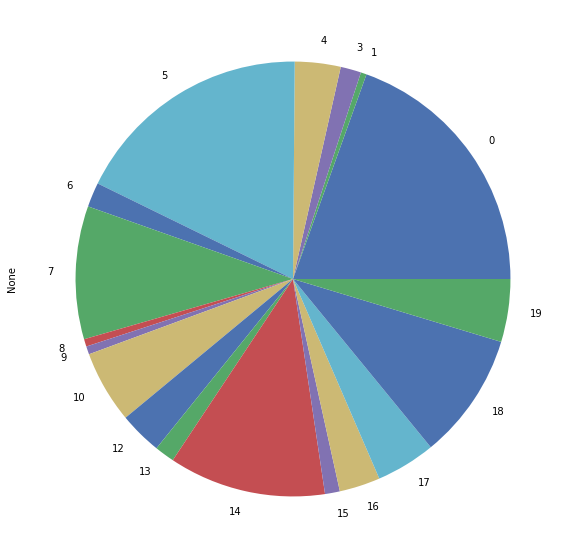

In [7]:
### NORMAL EMA/MEAN HISTORICAL VALUE

#mu = expected_returns.mean_historical_return(df)
#mu = expected_returns.ema_historical_return(df)
mu = expected_returns.capm_return(df)
#mu = expected_returns.returns_from_prices(df)
#mu = expected_returns.prices_from_returns(df)

#S = risk_models.sample_cov(df)
#S = risk_models.semicovariance(df)
#S = risk_models.exp_cov(df)
#S = risk_models.min_cov_determinant(df)
#S = risk_models.CovarianceShrinkage(df.cov(min_periods=15))
#S = risk_models.risk_matrix(prices=df, method='ledoit_wolf')
#S = risk_models.risk_matrix(prices=df, method='ledoit_wolf_single_factor')
S = risk_models.risk_matrix(prices=df, method='oracle_approximating')

#mu.plot.barh(figsize=(10,5))
#plotting.plot_covariance(S, plot_correlation=True)



# Pretend that you started with a default-weight allocation
initial_weights = np.array([1/len(tickers)] * len(tickers))

print("==================================")

coins_list = [
    "ABNB", "V", "AMD", "CSCO", "HNI", "ORI", 
    "SPR", "XOM", "CB", "LOW", "MDLZ", "GRWG", 
    "BIIB", "NVDA", "ADBE", "CRSR", "INTC", "JNJ", 
    "JPM", "LAZ"
]

initial_weights = np.array([
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5.11, 9.11, 7.73, 7.85, 5.80, 4.89
])
print(type(initial_weights))
print(coins_list)
print("==================================")
gamma = 0.05

ef = EfficientFrontier(mu, S, weight_bounds=(0, 1), gamma=gamma)
ef.add_objective(objective_functions.transaction_cost, w_prev=initial_weights, k=0.001) # 0.1% broker commission
ef.add_objective(objective_functions.L2_reg, gamma=gamma)  # default is gamma=1

ef.min_volatility()
#ef.max_sharpe()
#ef.max_quadratic_utility()
#ef.min_efficient_risk(0.5)
#ef.min_efficient_return(0.5)


cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True, risk_free_rate=0.01) # 1% US Bond rate

pd.Series([abs(i) for i in cleaned_weights.values()]).plot.pie(figsize=(10,10))

capital = 19500
latest_prices = get_latest_prices(df)
da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=capital, short_ratio=0.3)

allocation, leftover = da.lp_portfolio()
#allocation, leftover = da.greedy_portfolio()

print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

#pd.Series(cleaned_weights).plot.pie(figsize=(10,10))

ef: <pypfopt.hierarchical_portfolio.HRPOpt object at 0x7f2ee9288b50>
cleaned weight: OrderedDict([('ABNB', 0.07025), ('ADBE', 0.00069), ('AMD', 0.06571), ('BIIB', 0.0006), ('CB', 0.0012), ('CRSR', 0.09497), ('CSCO', 0.04785), ('GRWG', 0.15273), ('HNI', 0.05872), ('INTC', 0.03311), ('JNJ', 0.00175), ('JPM', 0.00863), ('LAZ', 0.16574), ('LOW', 0.00277), ('MDLZ', 0.02685), ('NVDA', 0.0007), ('ORI', 0.24244), ('SPR', 0.0127), ('V', 0.00084), ('XOM', 0.01175)])
Expected annual return: 634706.0%
Annual volatility: 10497.6%
Sharpe Ratio: 60.46
Discrete allocation: {'ABNB': 16, 'AMD': 26, 'CRSR': 86, 'CSCO': 38, 'GRWG': 137, 'HNI': 60, 'INTC': 25, 'JNJ': 1, 'JPM': 2, 'LAZ': 143, 'LOW': 1, 'MDLZ': 17, 'ORI': 445, 'SPR': 12, 'XOM': 10}
Funds remaining: $11.66


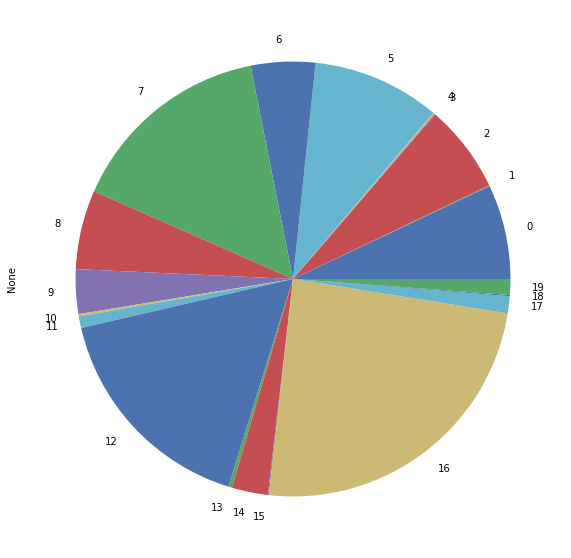

In [23]:
### HRPOPT TECHNIQUE

# En HRP on ne fait pas d'estimation des perfs 
mu = df

#S = risk_models.sample_cov(df)
#S = risk_models.semicovariance(df)
#S = risk_models.exp_cov(df)
#S = risk_models.min_cov_determinant(df)
#S = risk_models.CovarianceShrinkage(df.cov(min_periods=15))
#S = risk_models.risk_matrix(prices=df, method='ledoit_wolf')
#S = risk_models.risk_matrix(prices=df, method='ledoit_wolf_single_factor')
S = risk_models.risk_matrix(prices=df, method='oracle_approximating')

#mu.plot.barh(figsize=(10,5))
#plotting.plot_covariance(S, plot_correlation=True)

ef = HRPOpt(mu, S)

#import scipy.cluster.hierarchy as sch
#print(sch._LINKAGE_METHODS)
raw_weights = ef.optimize('single')

print(f"ef: {ef}")
#print(f"raw_weights: {raw_weights}")
cleaned_weights = ef.clean_weights()
print(f"cleaned weight: {cleaned_weights}")

ef.portfolio_performance(verbose=True, risk_free_rate=0.02)

pd.Series([abs(i) for i in cleaned_weights.values()]).plot.pie(figsize=(10,10))

latest_prices = get_latest_prices(df)
da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=35802, short_ratio=0.3)

allocation, leftover = da.lp_portfolio()
#allocation, leftover = da.greedy_portfolio()

print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

#pd.Series(cleaned_weights).plot.pie(figsize=(10,10))

=== PRICES (df) ====
                  ABNB        ADBE        AMD        BIIB          CB  \
Date                                                                    
1962-01-02         NaN         NaN        NaN         NaN         NaN   
1962-01-03         NaN         NaN        NaN         NaN         NaN   
1962-01-04         NaN         NaN        NaN         NaN         NaN   
1962-01-05         NaN         NaN        NaN         NaN         NaN   
1962-01-08         NaN         NaN        NaN         NaN         NaN   
...                ...         ...        ...         ...         ...   
2020-12-21  163.020004  498.390015  93.230003  248.320007  151.750000   
2020-12-22  163.190002  504.170013  93.160004  247.869995  150.169998   
2020-12-23  158.009995  496.910004  91.550003  251.199997  151.059998   
2020-12-24  154.839996  499.859985  91.809998  248.889999  150.830002   
2020-12-28  155.809998  498.850006  92.184998  244.309998  152.139999   

                 CRSR       C

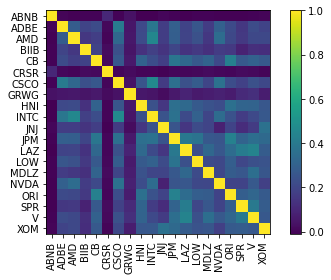

=== MARKET PRIOR ====
ABNB    0.020061
ADBE    0.111643
AMD     0.130678
BIIB    0.072213
CB      0.060055
CRSR    0.020396
CSCO    0.093634
GRWG    0.027788
HNI     0.072429
INTC    0.106558
JNJ     0.064848
JPM     0.102891
LAZ     0.058158
LOW     0.080283
MDLZ    0.039781
NVDA    0.112467
ORI     0.065306
SPR     0.053672
V       0.050240
XOM     0.064550
dtype: float64
==== VARIANCES =====
[0.015625, 0.022500000000000006, 0.015625, 0.0056250000000000015, 0.0025000000000000005, 0.015625, 0.022500000000000006, 0.015625, 0.0056250000000000015, 0.0025000000000000005, 0.015625, 0.022500000000000006, 0.015625, 0.0056250000000000015, 0.0025000000000000005, 0.015625, 0.022500000000000006, 0.015625, 0.0056250000000000015, 0.0025000000000000005]
==== OMEGA =====
[[0.015625 0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.      ]
 [0.       0.0225   0.       0.       0.       0.       0

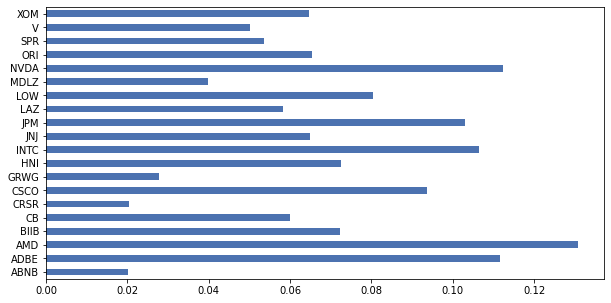

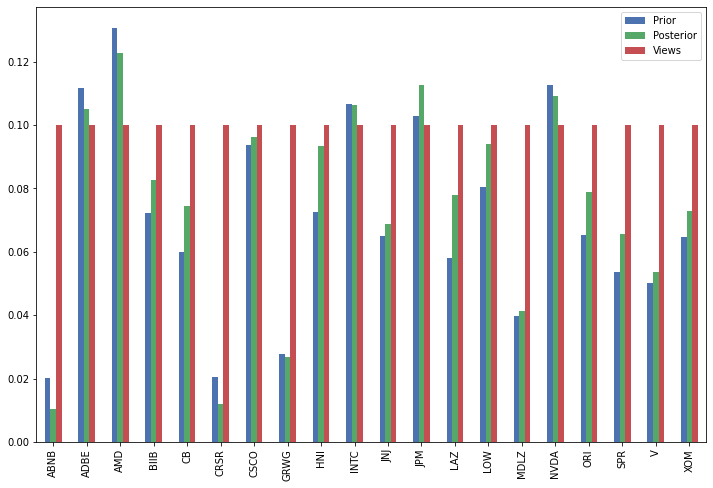

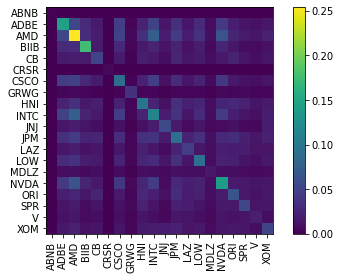

/home/remi/.virtualenvs/data-acc-msZwibCE/lib/python3.8/site-packages/pypfopt/efficient_frontier.py:195: UserWarning: max_sharpe transforms the optimisation problem so additional objectives may not work as expected.
  warnings.warn(


Leftover: $16.65
{'ADBE': 3, 'AMD': 17, 'BIIB': 4, 'CB': 7, 'CSCO': 29, 'GRWG': 2, 'HNI': 37, 'INTC': 30, 'JNJ': 6, 'JPM': 13, 'LAZ': 26, 'LOW': 8, 'MDLZ': 6, 'NVDA': 3, 'ORI': 53, 'SPR': 22, 'V': 3, 'XOM': 23}


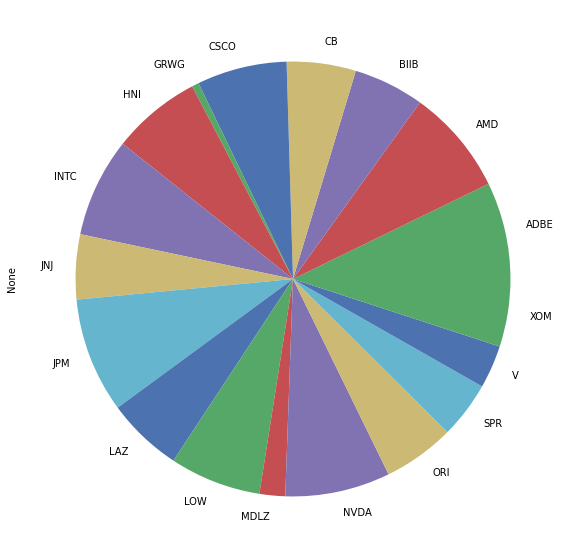

In [28]:
# Black-Litterman

from pypfopt import black_litterman, risk_models

"""
cov_matrix is a NxN sample covariance matrix
mcaps is a dict of market caps
market_prices is a series of S&P500 prices
"""

from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting

print("=== PRICES (df) ====")
print(df)

print("=== MCAPS ====")
print(mcaps)

S = risk_models.CovarianceShrinkage(df).ledoit_wolf()
print("=== RISK MODEL ====")
print(S)
delta = black_litterman.market_implied_risk_aversion(df) # Je trouve le Delta elevé
print("=== DELTA ====")
print(delta)
delta = 2.5042720332949346

plotting.plot_covariance(S, plot_correlation=True);

"""
ANCIEN CALCUL FAIT CELLULE 1
print(tickers["bitcoin"]["market_cap"].iloc[-1])
#mcaps = {i:tickers[i].iloc[-1] for i in coins_list}

print("==== MCAPS =====")
print(mcaps)
### MCAPS == PRICE != MARKET_CAP
"""

market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
print("=== MARKET PRIOR ====")
print(market_prior)

market_prior.plot.barh(figsize=(10,5));

# Contruction de la view pour estimer

# Relative View
"""Each view has a corresponding row in the picking matrix (the order matters)
Absolute views have a single 1 in the column corresponding to the ticker’s order in the universe.
Relative views have a positive number in the nominally outperforming asset columns and a negative number in the nominally underperforming asset columns. 
The numbers in each row should sum up to 0."""

"""
Q = np.array([-0.20, 0.05, 0.10, 0.15]).reshape(-1, 1) # Absolute
P = np.array( # Relative
    [
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, -1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0.5, 0.5, -0.5, -0.5, 0, 0],
    ]
)
# Absolute View
viewdict = {
    "bitcoin": 0.10,
    "ethereum": 0.30,
    "binancecoin": 0.05,
    "chainlink": 0.05,
    "eos": 0.20,
}

# Optionnal - Arbitrary confidences
confidences = [
    0.6,
    0.4,
    0.2,
    0.5,
    0.7
]
"""
#bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict, view_confidences=confidences, omega="idzorek", tau=0.05)
# Optional - Standard deviation confidences
# Absolute View
viewdict = {
    "ABNB": 0.10, 
    "V": 0.10, 
    "AMD": 0.10, 
    "CSCO": 0.10,
    "HNI": 0.10, 
    "ORI": 0.10, 
    "SPR": 0.10, 
    "XOM": 0.10, 
    "CB": 0.10, 
    "LOW": 0.10, 
    "MDLZ": 0.10, 
    "GRWG": 0.10, 
    "BIIB": 0.10, 
    "NVDA": 0.10, 
    "ADBE": 0.10, 
    "CRSR": 0.10, 
    "INTC": 0.10, 
    "JNJ": 0.10, 
    "JPM": 0.10, 
    "LAZ": 0.10, 
}


intervals = [
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
]
variances = []
for lb, ub in intervals:
    sigma = (ub - lb)/2
    variances.append(sigma ** 2)
    
print("==== VARIANCES =====")
print(variances)
omega = np.diag(variances)

print("==== OMEGA =====")
print(omega)

# We are using the shortcut to automatically compute market-implied prior
# pi = market_prior
bl = BlackLittermanModel(
    cov_matrix=S, 
    pi="market", 
    absolute_views=viewdict,
    market_caps=mcaps, 
    risk_aversion=delta, 
    omega=omega, 
    tau=0.05, 
    risk_free_rate=0.01
)
# args de BlackLittermanModel (cov_matrix, pi=None, absolute_views=None, Q=None, P=None, omega=None, view_confidences=None, tau=0.05, risk_aversion=1)
"""
#fig, ax = plt.subplots(figsize=(7,7))
#im = ax.imshow(bl.omega)

# We want to show all ticks...
#ax.set_xticks(np.arange(len(bl.tickers)))
#ax.set_yticks(np.arange(len(bl.tickers)))

#ax.set_xticklabels(bl.tickers)
#ax.set_yticklabels(bl.tickers)
#plt.show()
#np.diag(bl.omega)
"""

# Posterior estimate of returns
ret_bl = bl.bl_returns()
print("==== RET_BLACKLITTERMAN =====")
print(ret_bl)
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)], 
             index=["Prior", "Posterior", "Views"]).T


rets_df.plot.bar(figsize=(12,8));

# Posterior covariance estimate
S_bl = bl.bl_cov()
plotting.plot_covariance(S_bl);


### PORTFOLIO ALLOCATION

from pypfopt import EfficientFrontier, objective_functions

ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
#ef.max_sharpe() # Pk conflict avec les fonctions de régularisations ?
ef.min_volatility()
#bl.bl_weights(delta)
weights = ef.clean_weights()


pd.Series(weights).plot.pie(figsize=(10,10));


from pypfopt import DiscreteAllocation

capital = 19500
da = DiscreteAllocation(weights, df.iloc[-1], total_portfolio_value=capital)
alloc, leftover = da.lp_portfolio()
print(f"Leftover: ${leftover:.2f}")
print(alloc)
